In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
from matplotlib.patches import Rectangle

In [2]:
def plot_mem_variance(variable):
  def plot_mems_specific(lg_,lt2_,sd_,ax):
    mem_lg = [lg_['explained_var_in_pc1_mem'][0][0],lg_['explained_var_in_pc2_mem'][0][0],lg_['explained_var_in_pc3_mem'][0][0]]
    ct_lg = [lg_['explained_var_in_pc1_ct'][0][0],lg_['explained_var_in_pc2_ct'][0][0],lg_['explained_var_in_pc3_ct'][0][0]]
    cl_lg = [lg_['explained_var_in_pc1_cl'][0][0],lg_['explained_var_in_pc2_cl'][0][0],lg_['explained_var_in_pc3_cl'][0][0]]

    mem_lt2 = [lt2_['explained_var_in_pc1_mem'][0][0],lt2_['explained_var_in_pc2_mem'][0][0],lt2_['explained_var_in_pc3_mem'][0][0]]
    ct_lt2 = [lt2_['explained_var_in_pc1_ct'][0][0],lt2_['explained_var_in_pc2_ct'][0][0],lt2_['explained_var_in_pc3_ct'][0][0]]
    cl_lt2 = [lt2_['explained_var_in_pc1_cl'][0][0],lt2_['explained_var_in_pc2_cl'][0][0],lt2_['explained_var_in_pc3_cl'][0][0]]

    mem_sd = [sd_['explained_var_in_pc1_mem'][0][0],sd_['explained_var_in_pc2_mem'][0][0],sd_['explained_var_in_pc3_mem'][0][0]]
    ct_sd = [sd_['explained_var_in_pc1_ct'][0][0],sd_['explained_var_in_pc2_ct'][0][0],sd_['explained_var_in_pc3_ct'][0][0]]
    cl_sd = [sd_['explained_var_in_pc1_cl'][0][0],sd_['explained_var_in_pc2_cl'][0][0],sd_['explained_var_in_pc3_cl'][0][0]]

    mem_bar = [mem_lg,mem_lt2,mem_sd]
    ct_bar = [ct_lg,ct_lt2,ct_sd]
    cl_bar = [cl_lg,cl_lt2,cl_sd]

    plotss = [mem_bar,ct_bar,cl_bar]
    for a,pl,tit in zip(ax,plotss,['MeM','Cancer type','Cell line']):
      for p,ind,c,label in zip(pl,[1,2,3],['g','darkorange','royalblue'],['Localgini','LocalT2','StanDep']):
        temp = ind+np.array([1,5,9])
        a.bar(temp,p,color=c,label=label,alpha=0.8)
        for p_ in range(len(p)):
          a.text(temp[p_],p[p_]+1,round(p[p_],2),color='k',fontdict={'fontweight':'bold','fontsize':15},horizontalalignment='center')
      a.set_ylim(0,100)
      a.set_title(f'Contributing factor: {tit}',fontdict={'weight': 'bold','size': 25 },bbox=dict(facecolor='none',edgecolor='black'))
      a.set_yticks(a.get_yticks())
      a.set_yticklabels(a.get_yticks(),fontsize=20,fontweight='bold')
      a.set_xticks([3,7,11])
      a.set_xticklabels(['PC1','PC2','PC3'],fontsize=20,fontweight='bold')
      a.set_xlabel('Principal components',fontsize=20,fontweight='bold')
      # a.legend(loc='upper right',prop={'weight' : 'bold',
            # 'size'   : 25})
      a.spines['right'].set_visible(False)
      a.spines['top'].set_visible(False)
    # a.spines['left'].set_visible(False)
      a.spines['bottom'].set_visible(False)

  fig,axes = plt.subplots(3,2,figsize=(30,30),gridspec_kw={'hspace':0.3})
  ax = axes[:,1]
  lg_ = scipy.io.loadmat('./'+variable+'/3mem/LG_var_'+variable+'_3mem.mat')
  lt2_ = scipy.io.loadmat('./'+variable+'/3mem/LT2_var_'+variable+'_3mem.mat')
  sd_ = scipy.io.loadmat('./'+variable+'/3mem/SD_var_'+variable+'_3mem.mat')
  plot_mems_specific(lg_,lt2_,sd_,ax)

  ax = axes[:,0]
  lg_ = scipy.io.loadmat('./'+variable+'/all_mem/LG_var_'+variable+'.mat')
  lt2_ = scipy.io.loadmat('./'+variable+'/all_mem/LT2_var_'+variable+'.mat')
  sd_ = scipy.io.loadmat('./'+variable+'/all_mem/SD_var_'+variable+'.mat')
  plot_mems_specific(lg_,lt2_,sd_,ax)
  plt.tight_layout()

  # fig.text(0.55, 0, 'Principal components', ha='center',fontdict={'weight': 'bold','size': 30 })
  if variable=='met_task':
    fig.text(0.06, 0.5, '% of explained variance in metabolic functionalities of built models', va='center', rotation='vertical',fontdict={'weight': 'bold','size': 30 })
  elif variable=='rxn_content':
    fig.text(0.06, 0.5, '% of explained variance in reaction content of built models', va='center', rotation='vertical',fontdict={'weight': 'bold','size': 30 })
  fig.text(0.29, 0.057, '(a) All MeMs are considered', ha='center',fontdict={'weight': 'bold','size': 30 })
  fig.text(0.72, 0.057, '(b) FASTCORE, MBA and mCADRE are considered', ha='center',fontdict={'weight': 'bold','size': 30 })
  

  labels = ['Localgini','LocalT2','StanDep']
  handles = [Rectangle((0,0),1,1,fc=i, alpha = 1) for i in ['g','darkorange','royalblue']]
  fig.legend(handles,labels, loc='lower center', bbox_to_anchor=(0.1, 0.01, 0.8, 0.9),frameon=0,mode='expand',ncol=3,prop={'size':30,'weight':'bold'})

  plt.savefig('exp_variance_'+variable+'.pdf',bbox_inches = 'tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_28616\2498668977.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


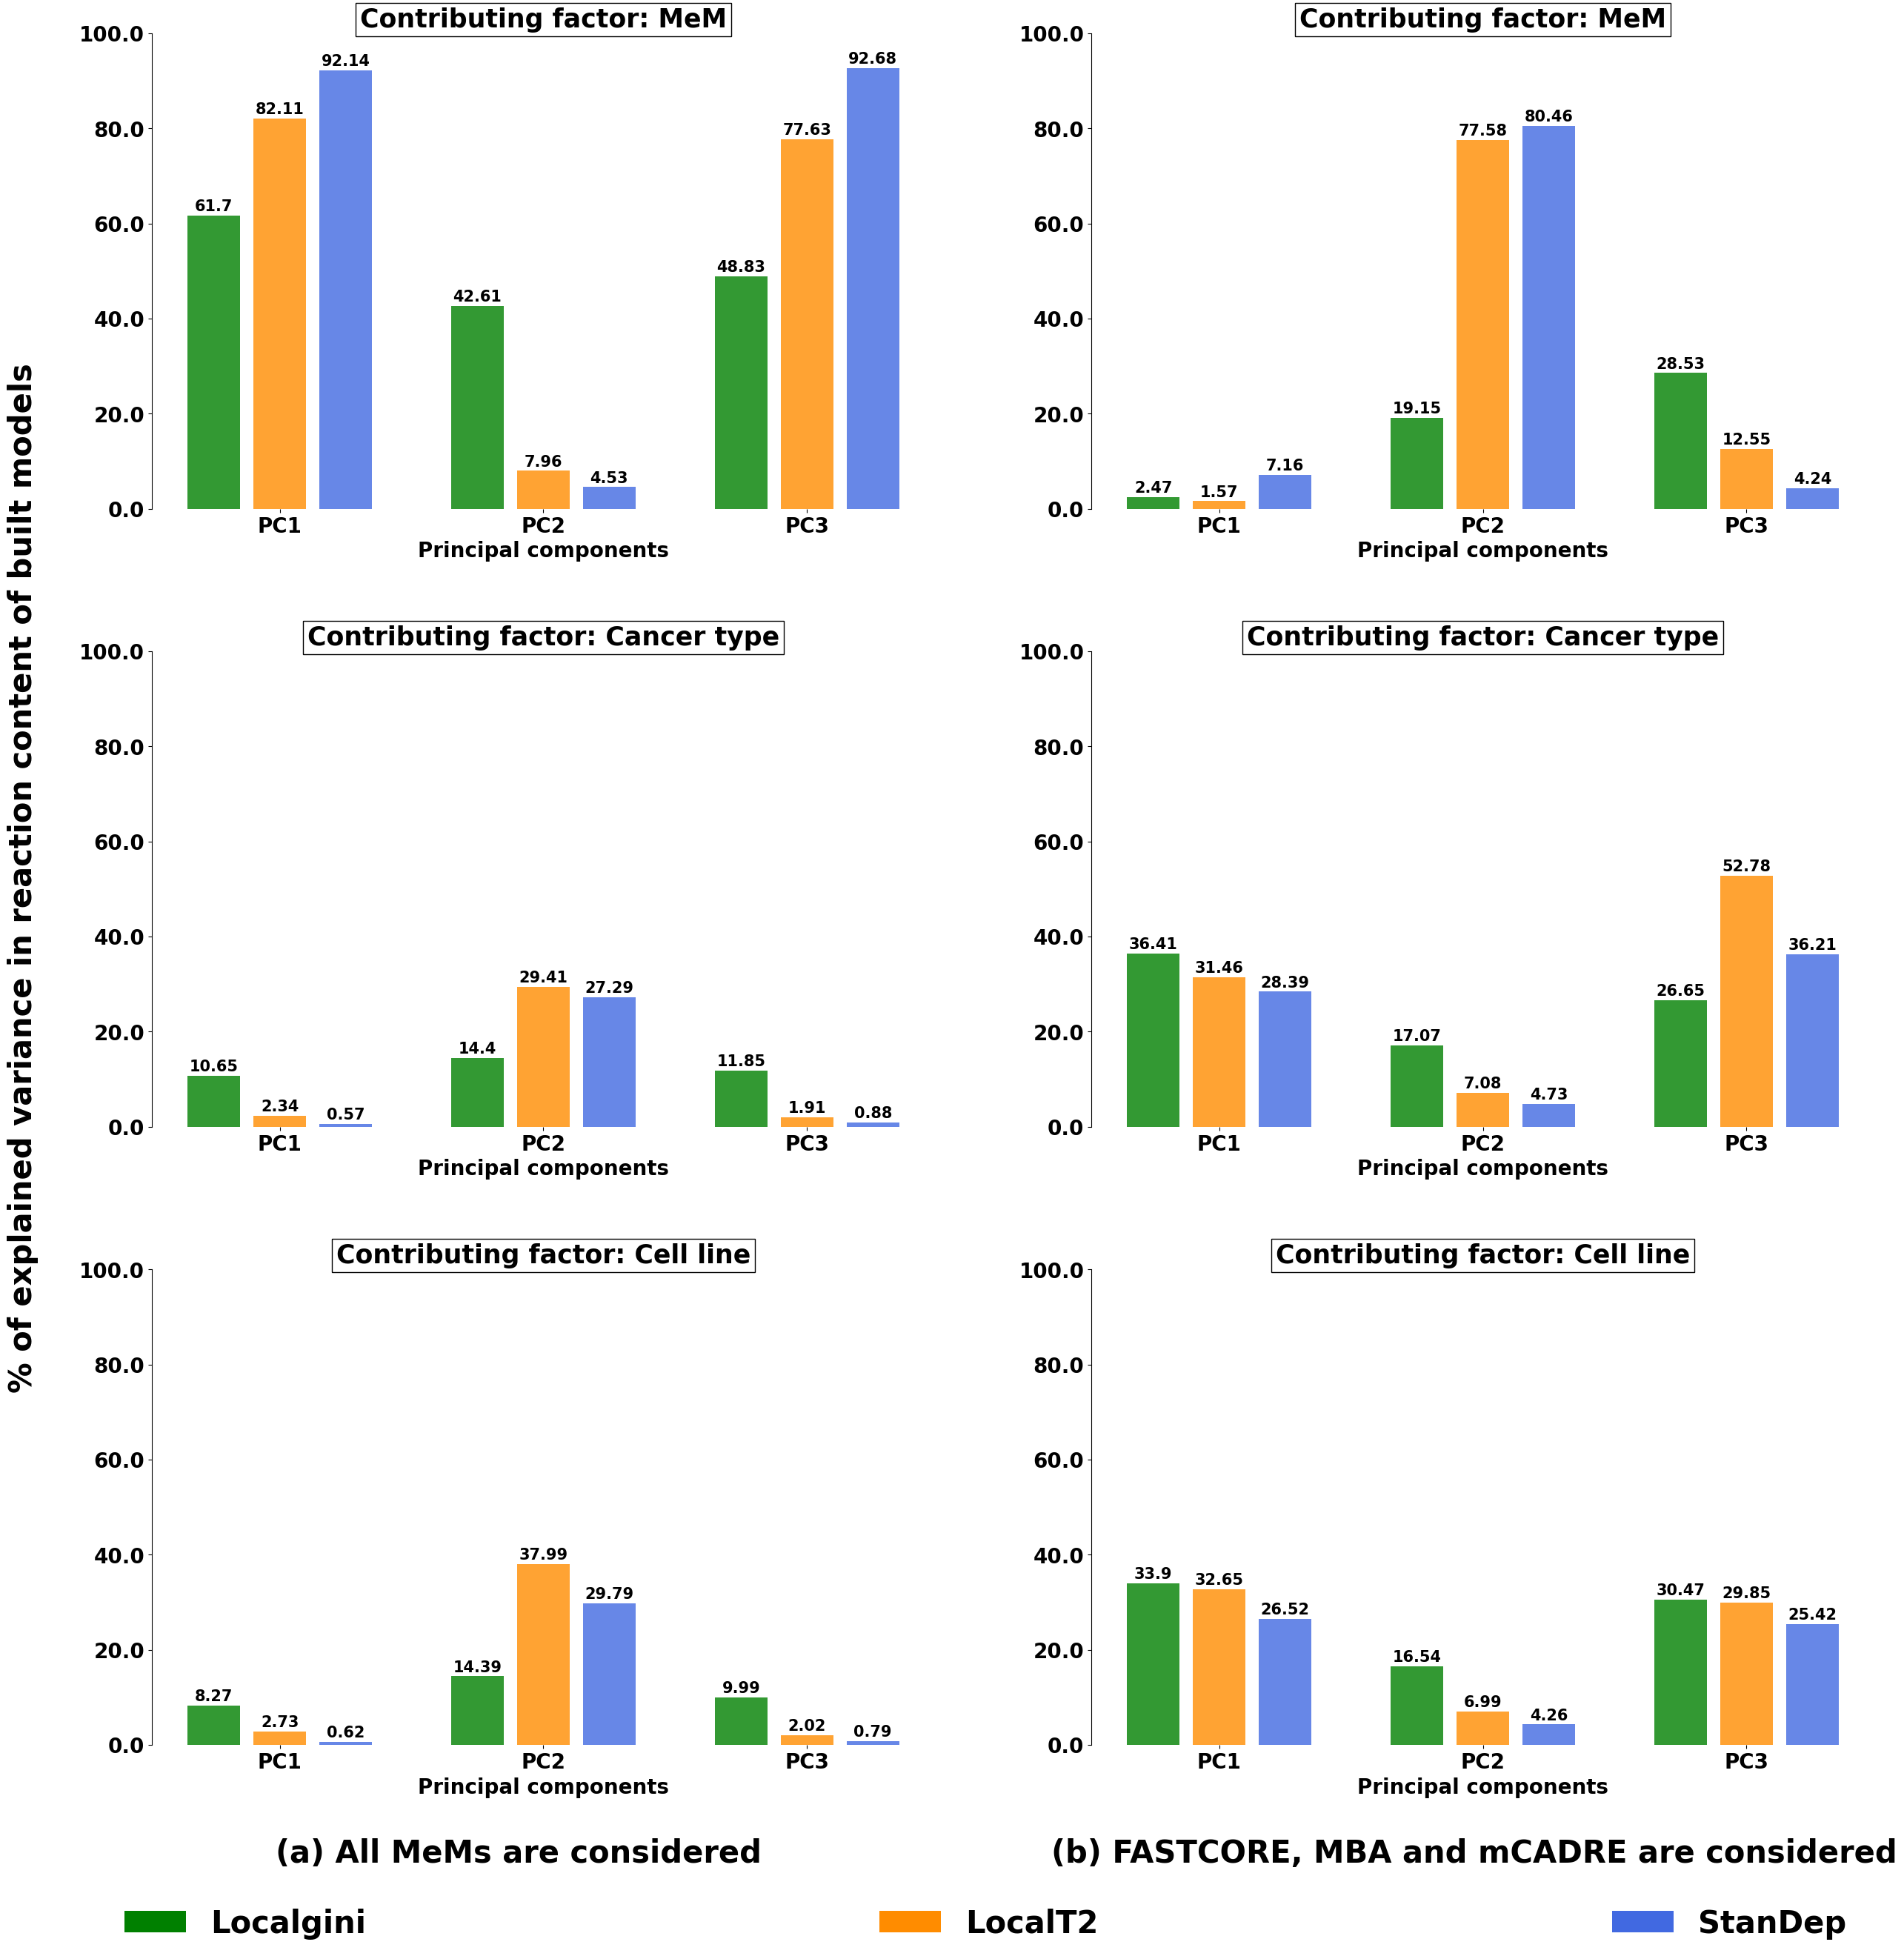

In [3]:
plot_mem_variance('rxn_content')

C:\Users\Admin\AppData\Local\Temp\ipykernel_28616\2498668977.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


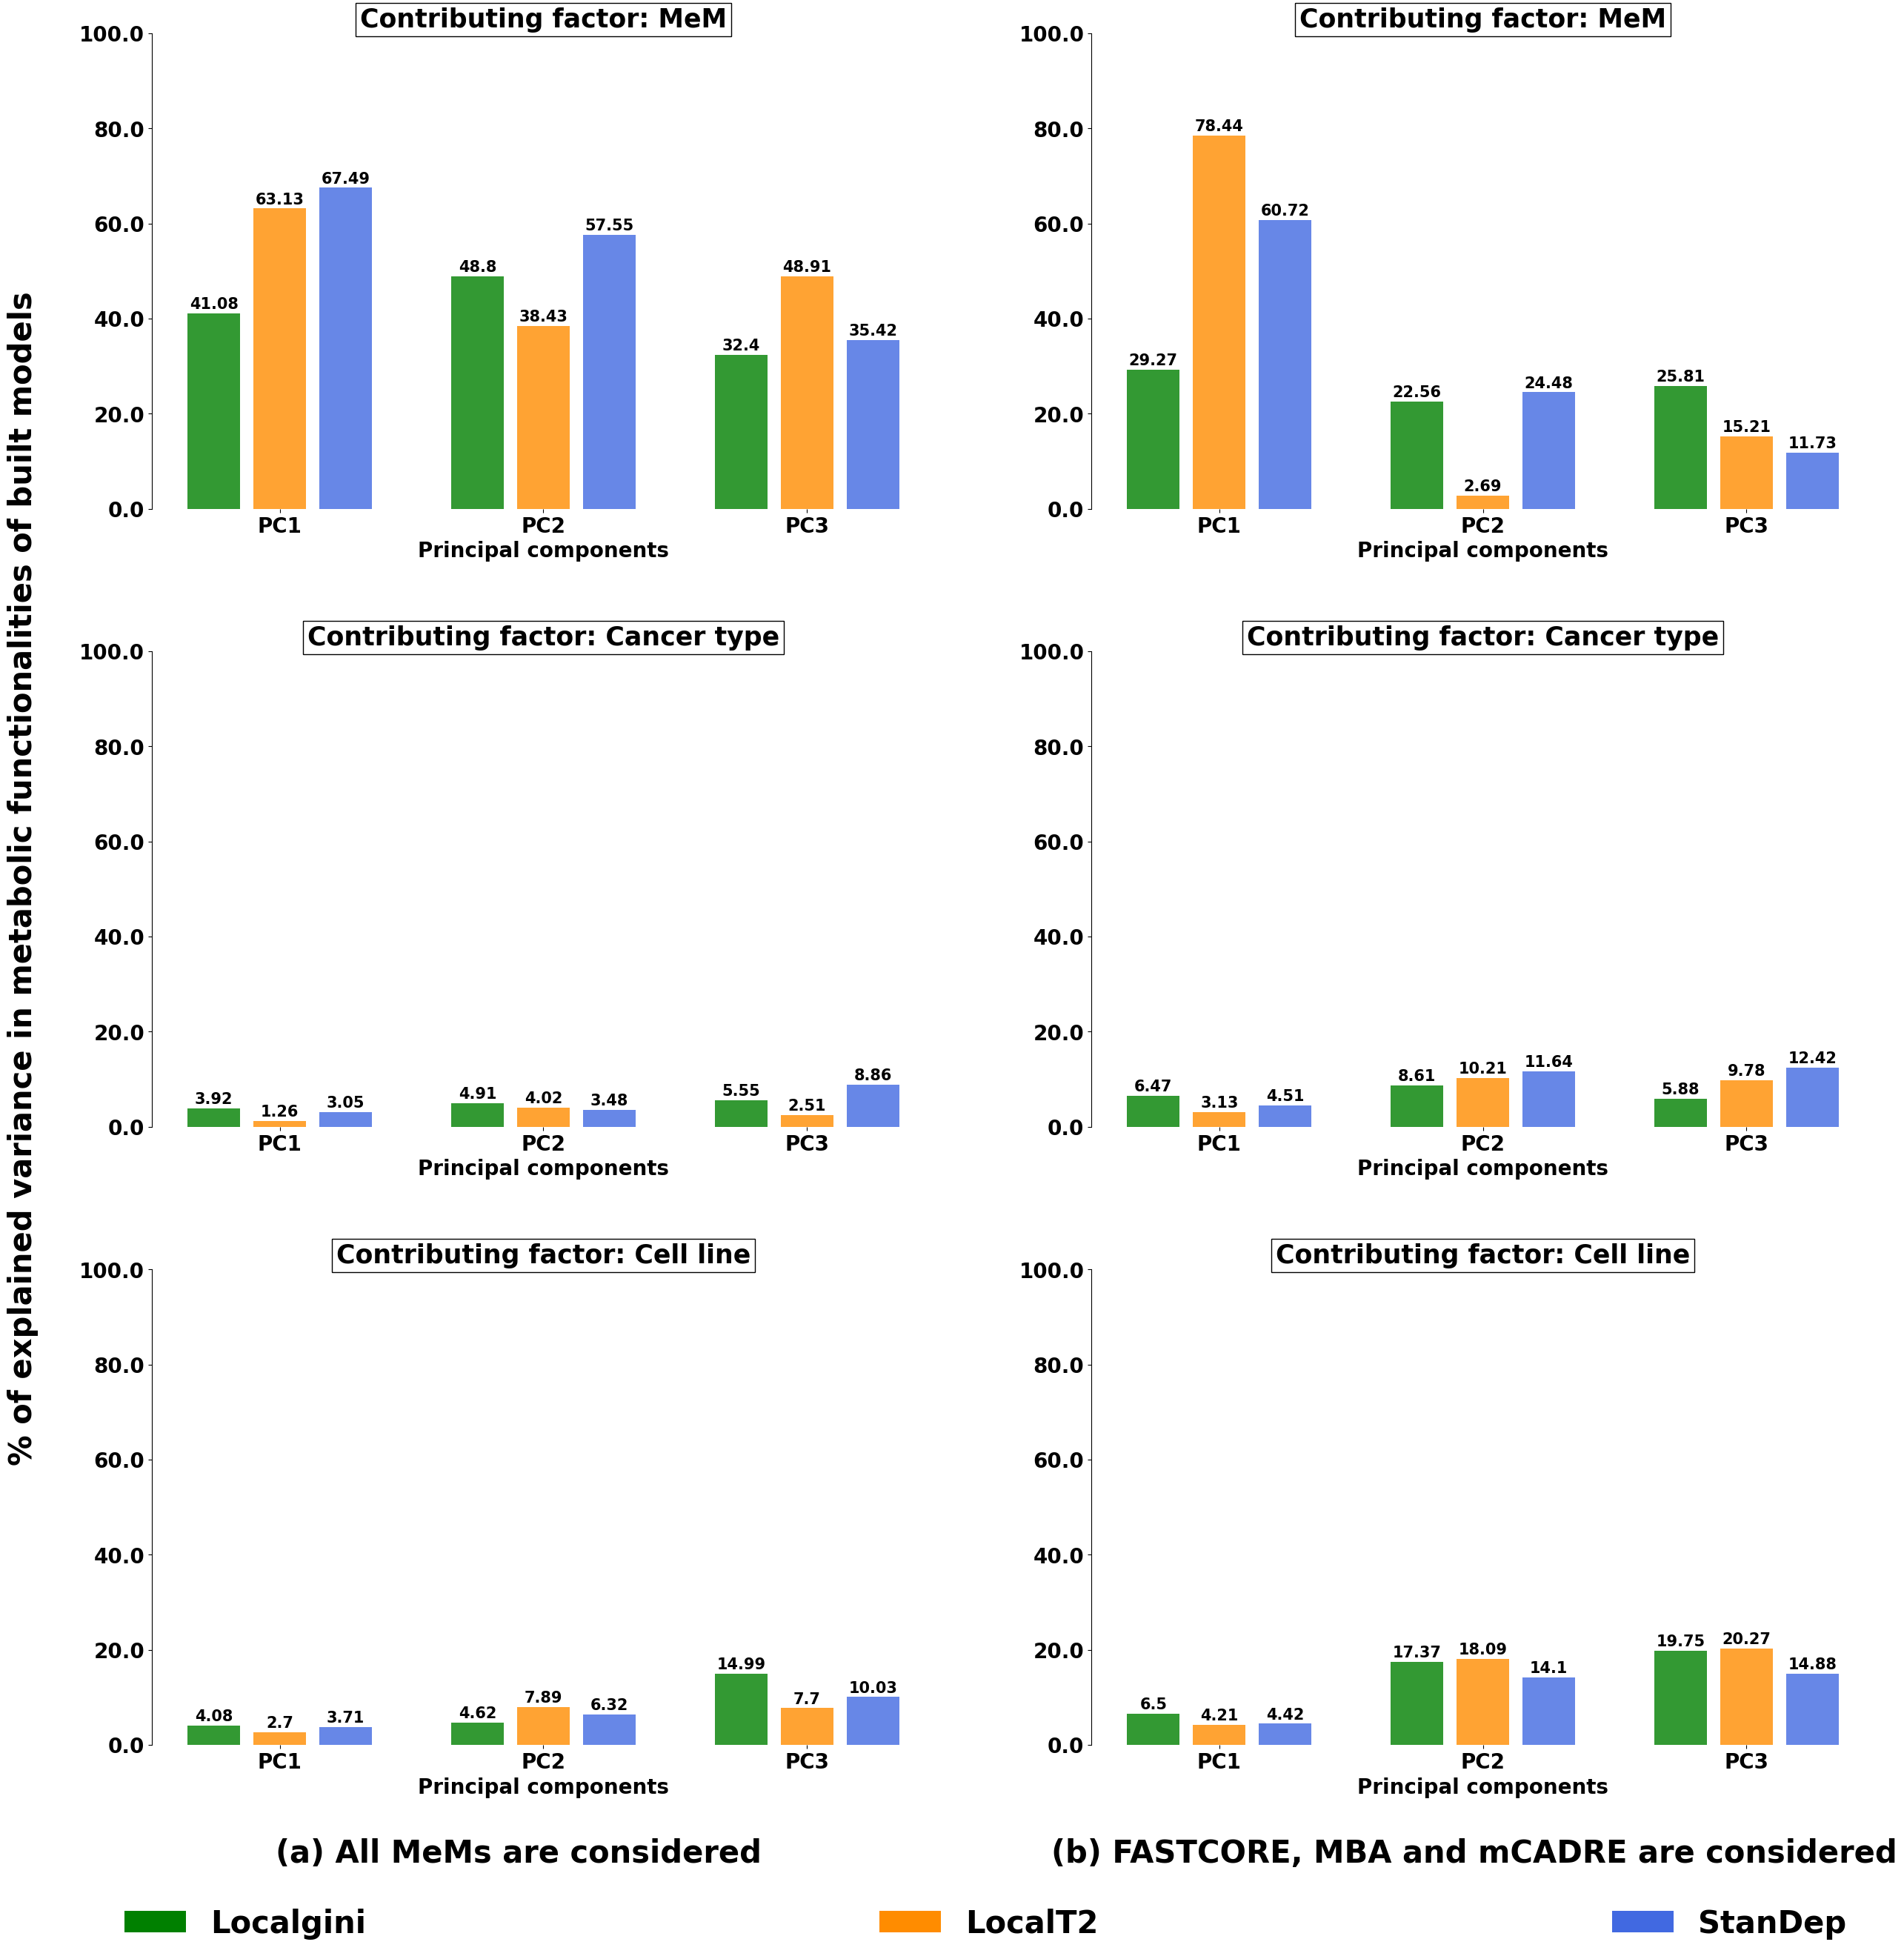

In [4]:
plot_mem_variance('met_task')